# Autoencoders and an introduction to Artificial Neural Networks
Chapters 11 and 12 introduce us to Autoencoders, which are an unsupervised type of Artificial Neural Network (ANN) that can represent source input data in a compact fashion (_encoding step_) and restore the data from its compact form to a resonable facisimle (_decoding step_). One of the really cool properties about Autoencoders is that they are a form of ANN and Neural Network (NN) that can arbitrarily encode _any_ function so long as the following things hold true: (1) they include at least _one hidden layer_ or layer that cannot be directly manipulated as part of the network (other than its size) and (2) that the output of the encoding step is non-linear, and as such it uses an _activation function_ which turns the encoding step of the network into something non-linear. Examples of these functions include ones we've seen before as introduced in the book, e.g., _sigmoid_ (chapter 4), _tangent (tan)_ or a new one introduced, but not explained, _ReLU_ or _rectifying linear unit_. A side property of these functions is to not only turn the network non-linear, but also to represent _activation_ of the _neuron_ (really just one of the hidden layer values). If the neuron _fires_ then its activation is said to be represented by the non-linear function as _active_. So for example, in sigmoid, this would mean a resultant value of *1* or *0* if it hasn't fired and so on. Autoencoders have many uses in real life outside of data compression, for example:

   1. Anomaly Detection - If the Autoencoder learns a representation of a set of images, for example, and then another image that doesn't have a similar learned representation is provided to the network, the loss function variance should be quite different from those images trained in the network.
   2. De-noising - If provided an image containing ample noise (e.g., taken by a bad instrument or source, or manipulated in some way, through the internally learned representation of the network, the decoding step can actually restore or de-noise the image to its original or close to original form.
   3. Generative Neworks - for example to combine a learned representation of a bat, and a horse to generate (by averaging or using means) a "horse bat" or other things not seen before.
   
The first edition of the book doesn't include an end of chapter assignment suggestion, but the last thing you do in the first edition of the book for this listing is to download some images from the [CIFAR-10 Python Dataset](http://www.cs.toronto.edu/~kriz/cifar.html) which are labeled images from the [80 million tiny images dataset](http://people.csail.mit.edu/torralba/tinyimages/) of 10 classes/types of objects, and then to represent the images (*32 x 32* pixels in *RGB* format) using an Autoencoder. In particular the book shows you how to take the image, represent an image of 32x32 pixels in row major order (e.g., as a vector of \[1x1024\] pixels) and then for the R,G,B values in each pixel, how to average them into a greyscale intensity. From there, you can select, e.g., all the pictures of horses (5000 images), and build an Autoencoder network using Tensorflow to encode and decode the image and test out the learned representations of them image(s). 

I had to dig around in the first edition of the book code for some additional examples beyond this. I found [Ch07 Examples](https://github.com/BinRoot/TensorFlow-Book/tree/master/ch07_autoencoder) that had some cool additional things to check out, in particular:

   1. Image plotting code to show you the horses you are selecting, and also to plot their learned representations, so you can visualize the input and output of the network from CIFAR-10.
   2. Code to perform a _classify_ function - yes - Autoencoders can be used similar to regression techniques to take their learned representation and classify things of a particular type (e.g., train up on horse images, and then use the learned loss as a differentiator for other types of images (e.g., of a dog). Interestingly, the variation is small (likely due to the smallness of the images), only about *1.5* but it's still statistically significant and obviously this is something that you can threshold when building a classifier of a particular type. For example I imagine if you were to build a gun classifier for a particular type of semi-automatic gun, you would train on a bunch of those images into an Autoencoder network, and then test it against some other gun types to figure out the right loss-threshold balance that signifies the class of semi-automatic in a meaningful way.
   3. Code to do a De-Noising Autoencoder, see [this example](https://github.com/BinRoot/TensorFlow-Book/blob/master/ch07_autoencoder/Concept03_denoising.ipynb). I didn't play around with it directly but it is similar to this [other example](https://github.com/pkmital/tensorflow_tutorials/blob/master/python/08_denoising_autoencoder.py) I found though that example uses another style of Tensorflow network construction which looks to be more explicit than the implicit way the book is teaching us.
   4. Code to do a Deep Autoencoder, or [Stacked Autoencoder](https://towardsdatascience.com/deep-autoencoders-using-tensorflow-c68f075fd1a3) like is discussed in the book. Ended up hooking this up to the Tensorflow Dataset API for fun.
   
I made a diagram of the encoding and decoding process. I was thinking of doing an assignment to build e.g., an automatic weapons classifier or "long gun" or something classifier as I was motivated by some of the prior [DARPA MEMEX](http://memex.jpl.nasa.gov/) work we did in the area. I may do one, but I understand the concept enough now that I felt I would simply annotate the last listings and move on to the next chapter.

![Autoencoder Process](../../figs/ch12-autoencoder.png)

## References

   1. [CIFAR-10/-100 dataset](http://www.cs.toronto.edu/~kriz/cifar.html) - the key data used to illustrate the Autoencoder concepts.
   2. [Stanford's Unsupervised Learning Autoencoder chapter](http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders/) - A fantastic theoretical introduction to Autoencoders. A bit out of my league in the math, but worth a look if you want to understand the core theory.
   3. [Wikipedia article on Autoencoders](https://en.wikipedia.org/wiki/Autoencoder) - Besides the theory has some good use cases that explain what an Autoencoder is for.
   4. [Autoencoders and the CIFAR dataset](https://www.guru99.com/autoencoder-deep-learning.html) - Looks like this is where the book chose its examples from for Tensorflow although the examples here use the more explicit network creation methods in Tensorflow rather than the implicit stuff taught in the book.
   5. [Deep Autoencoders and Dimensionality Reduction](https://towardsdatascience.com/deep-autoencoders-using-tensorflow-c68f075fd1a3) - Shows how Autoencoders are similar to PCA and other dimensionality reduction techniques.
   6. [Different use cases for Autoencoders](https://towardsdatascience.com/auto-encoder-what-is-it-and-what-is-it-used-for-part-1-3e5c6f017726) - Shows how Autoencoders are used for different use cases. 
   7. [Deep AutoEncoders using TensorFlow - Towards Data Science](https://towardsdatascience.com/deep-autoencoders-using-tensorflow-c68f075fd1a3) - Great post for a 3 dimensional Deep auto encoder on MNIST. 

In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import losses
from sklearn import datasets
import os
import pickle
import time
import datetime

In [3]:
checkpoint_path = '../../models/model.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_freq=10)


In [4]:
log_dir = "../../data/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [5]:
%tensorboard --logdir ../../data/logs/fit

Reusing TensorBoard on port 6008 (pid 7414), started 1:09:53 ago. (Use '!kill 7414' to kill it.)

In [6]:
class Autoencoder(Model):
    def __init__(self, input_dim, hidden_dim):
        super(Autoencoder, self).__init__()
        
        self.encoder = tf.keras.Sequential([
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(hidden_dim, activation='tanh'),
        ])
        self.decoder = tf.keras.Sequential([
          tf.keras.layers.Dense(input_dim)
        ])

        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded



In [7]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
          tf.keras.layers.Input(shape=(32, 32, 1)),
          tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
          tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          tf.keras.layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          tf.keras.layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded



In [8]:
def classify(ae, data, labels):
    encoded_data = ae.encoder(data).numpy()
    decoded_data = ae.decoder(encoded_data).numpy()
    
    reconstructed = decoded_data[0]
    print('data', np.shape(data))
    print('reconstructed', np.shape(reconstructed))
    loss = np.sqrt(np.mean(np.square(data - reconstructed), axis=1))
    print('loss', np.shape(loss))
    horse_indices = np.where(labels == 7)[0]
    not_horse_indices = np.where(labels != 7)[0]
    horse_loss = np.mean(loss[horse_indices])
    not_horse_loss = np.mean(loss[not_horse_indices])
    print('horse', horse_loss)
    print('not horse', not_horse_loss)
    return encoded_data

In [9]:
def decode(ae, data):
    decoded_data = ae.decoder(data).numpy()
    return decoded_data

In [10]:
def test(ae, data):
    print('input', data)
    encoded_data = ae.encoder(data).numpy()
    decoded_data = ae.decoder(encoded_data).numpy()
    print('compressed', encoded_data)
    print('reconstructed', decoded_data)

In [11]:
def train(ae, x_train, x_test):
    ae.fit(x_train, x_train,
                    epochs=100,
                    shuffle=True,
                    batch_size=50,
                    validation_data=(x_test, x_test),
                    callbacks=[cp_callback, tensorboard_callback])  

In [12]:
def noise_train(autoencoder, x_train_noisy, x_test_noisy, x_train, x_test):
    autoencoder.fit(x_train_noisy, x_train,
                    epochs=50,
                    batch_size=50,                    
                    shuffle=True,
                    validation_data=(x_test_noisy, x_test),
                    callbacks=[cp_callback, tensorboard_callback])

In [13]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

In [14]:
def grayscale(a):
    return a.reshape(a.shape[0], 3, 32, 32).mean(1).reshape(a.shape[0], -1)

In [15]:
names = unpickle('../../data/cifar-10-batches-py/batches.meta')['label_names']
data, labels = [], []
for i in range(1, 6):
    filename = '../../data/cifar-10-batches-py/data_batch_' + str(i)
    batch_data = unpickle(filename)
    if len(data) > 0:
        data = np.vstack((data, batch_data['data']))
        labels = np.hstack((labels, batch_data['labels']))
    else:
        data = batch_data['data']
        labels = batch_data['labels']

In [16]:
data = grayscale(data)

In [17]:
x = np.matrix(data)
y = np.array(labels)
print(np.shape(x))
print(y)

(50000, 1024)
[6 9 9 ... 9 1 1]


In [18]:
horse_indices = np.where(y == 7)[0]
horse_x = x[horse_indices]
print(np.shape(horse_x))  # (5000, 3072)

(5000, 1024)


Some examples of horse images we will feed to the autoencoder for training


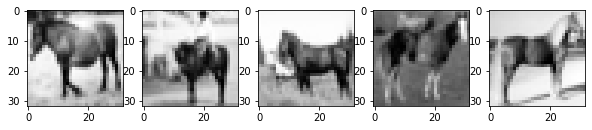

In [19]:
print('Some examples of horse images we will feed to the autoencoder for training')
plt.rcParams['figure.figsize'] = (10, 10)
num_examples = 5
for i in range(num_examples):
    horse_img = np.reshape(horse_x[i, :], (32, 32))
    plt.subplot(1, num_examples, i+1)
    plt.imshow(horse_img, cmap='Greys_r')
plt.show()

In [20]:
test_data = unpickle('../../data/cifar-10-batches-py/test_batch')
test_x = grayscale(test_data['data'])
test_labels = np.array(test_data['labels'])
test_horse_indices = np.where(test_labels==7)[0]
test_horse = test_x[test_horse_indices]

Some examples of test horse images we will use to evaluate the autoencoder


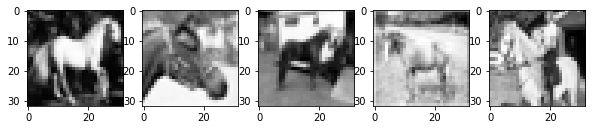

In [34]:
print('Some examples of test horse images we will use to evaluate the autoencoder')
plt.rcParams['figure.figsize'] = (10, 10)
num_examples = 5
for i in range(num_examples):
    horse_img = np.reshape(test_horse[i, :], (32, 32))
    plt.subplot(1, num_examples, i+1)
    plt.imshow(horse_img, cmap='Greys_r')
plt.show()

In [21]:
input_dim = np.shape(horse_x)[1]
hidden_dim = 100
ae = Autoencoder(input_dim, hidden_dim)
ae.compile(optimizer='rmsprop', loss=losses.MeanSquaredError())
ae.build((None,input_dim))
ae.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 100)               102500    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1024)              103424    
Total params: 205,924
Trainable params: 205,924
Non-trainable params: 0
_________________________________________________________________


In [22]:
train(ae, horse_x, test_horse)

Epoch 1/100
  1/100 [..............................] - ETA: 0s - loss: 18217.1523WARNING:tensorflow:From /Users/mattmann/git/py3-tf2/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.

Epoch 00001: saving model to ../../models/model.ckpt
 10/100 [==>...........................] - ETA: 0s - loss: 17620.7793
Epoch 00001: saving model to ../../models/model.ckpt
 24/100 [======>.......................] - ETA: 0s - loss: 17429.5938
Epoch 00001: saving model to ../../models/model.ckpt
 39/100 [==========>...................] - ETA: 0s - loss: 17314.5215
Epoch 00001: saving model to ../../models/model.ckpt

Epoch 00001: saving model to ../../models/model.ckpt
 50/100 [==============>...............] - ETA: 0s - loss: 17121.9355
Epoch 00001: saving model to ../../models/model.ckpt
 60/100 [===============

 80/100 [=======================>......] - ETA: 0s - loss: 6672.5503
Epoch 00007: saving model to ../../models/model.ckpt
 97/100 [============================>.] - ETA: 0s - loss: 6564.1631
Epoch 00007: saving model to ../../models/model.ckpt
100/100 [==============================] - 0s 5ms/step - loss: 6544.9102 - val_loss: 6206.7695
Epoch 8/100
  1/100 [..............................] - ETA: 0s - loss: 5880.9780
Epoch 00008: saving model to ../../models/model.ckpt
 17/100 [====>.........................] - ETA: 0s - loss: 5932.0254
Epoch 00008: saving model to ../../models/model.ckpt

Epoch 00008: saving model to ../../models/model.ckpt
 30/100 [========>.....................] - ETA: 0s - loss: 5959.3398
Epoch 00008: saving model to ../../models/model.ckpt
 48/100 [=============>................] - ETA: 0s - loss: 5870.0884
Epoch 00008: saving model to ../../models/model.ckpt

Epoch 00008: saving model to ../../models/model.ckpt
 60/100 [=================>............] - ETA: 0s - 

100/100 [==============================] - 0s 4ms/step - loss: 3602.4192 - val_loss: 3646.5693
Epoch 15/100
  1/100 [..............................] - ETA: 0s - loss: 3655.3391
Epoch 00015: saving model to ../../models/model.ckpt

Epoch 00015: saving model to ../../models/model.ckpt
 20/100 [=====>........................] - ETA: 0s - loss: 3658.4304
Epoch 00015: saving model to ../../models/model.ckpt

Epoch 00015: saving model to ../../models/model.ckpt
 40/100 [===========>..................] - ETA: 0s - loss: 3566.0154
Epoch 00015: saving model to ../../models/model.ckpt

Epoch 00015: saving model to ../../models/model.ckpt
 60/100 [=================>............] - ETA: 0s - loss: 3597.7744
Epoch 00015: saving model to ../../models/model.ckpt

Epoch 00015: saving model to ../../models/model.ckpt
 80/100 [=======================>......] - ETA: 0s - loss: 3590.3340
Epoch 00015: saving model to ../../models/model.ckpt
 90/100 [==========================>...] - ETA: 0s - loss: 3581.76

 12/100 [==>...........................] - ETA: 0s - loss: 3710.3330
Epoch 00022: saving model to ../../models/model.ckpt
 29/100 [=======>......................] - ETA: 0s - loss: 3592.8989
Epoch 00022: saving model to ../../models/model.ckpt

Epoch 00022: saving model to ../../models/model.ckpt
 40/100 [===========>..................] - ETA: 0s - loss: 3626.8704
Epoch 00022: saving model to ../../models/model.ckpt
 56/100 [===============>..............] - ETA: 0s - loss: 3611.8042
Epoch 00022: saving model to ../../models/model.ckpt

Epoch 00022: saving model to ../../models/model.ckpt
 70/100 [====================>.........] - ETA: 0s - loss: 3605.1577
Epoch 00022: saving model to ../../models/model.ckpt
 80/100 [=======================>......] - ETA: 0s - loss: 3601.5334
Epoch 00022: saving model to ../../models/model.ckpt
 99/100 [============================>.] - ETA: 0s - loss: 3589.9463
Epoch 00022: saving model to ../../models/model.ckpt
100/100 [=============================


Epoch 00029: saving model to ../../models/model.ckpt
 30/100 [========>.....................] - ETA: 0s - loss: 3638.3804
Epoch 00029: saving model to ../../models/model.ckpt
 40/100 [===========>..................] - ETA: 0s - loss: 3601.9482
Epoch 00029: saving model to ../../models/model.ckpt
 55/100 [===============>..............] - ETA: 0s - loss: 3593.1487
Epoch 00029: saving model to ../../models/model.ckpt
 69/100 [===================>..........] - ETA: 0s - loss: 3625.2683
Epoch 00029: saving model to ../../models/model.ckpt

Epoch 00029: saving model to ../../models/model.ckpt
 80/100 [=======================>......] - ETA: 0s - loss: 3601.8157
Epoch 00029: saving model to ../../models/model.ckpt
 96/100 [===========================>..] - ETA: 0s - loss: 3602.1567
Epoch 00029: saving model to ../../models/model.ckpt
100/100 [==============================] - 0s 5ms/step - loss: 3594.1340 - val_loss: 3637.5864
Epoch 30/100
  1/100 [..............................] - ETA: 0s -

 36/100 [=========>....................] - ETA: 0s - loss: 3574.9851
Epoch 00036: saving model to ../../models/model.ckpt

Epoch 00036: saving model to ../../models/model.ckpt
 50/100 [==============>...............] - ETA: 0s - loss: 3598.4285
Epoch 00036: saving model to ../../models/model.ckpt
 68/100 [===================>..........] - ETA: 0s - loss: 3604.9495
Epoch 00036: saving model to ../../models/model.ckpt

Epoch 00036: saving model to ../../models/model.ckpt
 80/100 [=======================>......] - ETA: 0s - loss: 3591.2515
Epoch 00036: saving model to ../../models/model.ckpt
 98/100 [============================>.] - ETA: 0s - loss: 3594.2192
Epoch 00036: saving model to ../../models/model.ckpt
100/100 [==============================] - 0s 4ms/step - loss: 3594.1516 - val_loss: 3636.7690
Epoch 37/100
  1/100 [..............................] - ETA: 0s - loss: 3492.6069
Epoch 00037: saving model to ../../models/model.ckpt

Epoch 00037: saving model to ../../models/model.ckp


Epoch 00043: saving model to ../../models/model.ckpt
 30/100 [========>.....................] - ETA: 0s - loss: 3561.2488
Epoch 00043: saving model to ../../models/model.ckpt
 46/100 [============>.................] - ETA: 0s - loss: 3571.3730
Epoch 00043: saving model to ../../models/model.ckpt

Epoch 00043: saving model to ../../models/model.ckpt
 60/100 [=================>............] - ETA: 0s - loss: 3582.9666
Epoch 00043: saving model to ../../models/model.ckpt
 75/100 [=====================>........] - ETA: 0s - loss: 3576.4258
Epoch 00043: saving model to ../../models/model.ckpt
 87/100 [=========================>....] - ETA: 0s - loss: 3585.5493
Epoch 00043: saving model to ../../models/model.ckpt
 97/100 [============================>.] - ETA: 0s - loss: 3595.3518
Epoch 00043: saving model to ../../models/model.ckpt
100/100 [==============================] - 0s 5ms/step - loss: 3594.1716 - val_loss: 3637.9460
Epoch 44/100
  1/100 [..............................] - ETA: 0s -

 47/100 [=============>................] - ETA: 0s - loss: 3609.7920
Epoch 00050: saving model to ../../models/model.ckpt

Epoch 00050: saving model to ../../models/model.ckpt
 60/100 [=================>............] - ETA: 0s - loss: 3596.7712
Epoch 00050: saving model to ../../models/model.ckpt
 75/100 [=====================>........] - ETA: 0s - loss: 3589.3335
Epoch 00050: saving model to ../../models/model.ckpt

Epoch 00050: saving model to ../../models/model.ckpt
 90/100 [==========================>...] - ETA: 0s - loss: 3591.4438
Epoch 00050: saving model to ../../models/model.ckpt
100/100 [==============================] - 0s 4ms/step - loss: 3594.1704 - val_loss: 3637.4189
Epoch 51/100
  1/100 [..............................] - ETA: 0s - loss: 3462.7659
Epoch 00051: saving model to ../../models/model.ckpt
 17/100 [====>.........................] - ETA: 0s - loss: 3667.9392
Epoch 00051: saving model to ../../models/model.ckpt

Epoch 00051: saving model to ../../models/model.ckp

 78/100 [======================>.......] - ETA: 0s - loss: 3612.2295
Epoch 00057: saving model to ../../models/model.ckpt

Epoch 00057: saving model to ../../models/model.ckpt
 90/100 [==========================>...] - ETA: 0s - loss: 3602.2175
Epoch 00057: saving model to ../../models/model.ckpt
100/100 [==============================] - 0s 4ms/step - loss: 3594.0845 - val_loss: 3637.7000
Epoch 58/100
  1/100 [..............................] - ETA: 0s - loss: 3191.8169
Epoch 00058: saving model to ../../models/model.ckpt
 19/100 [====>.........................] - ETA: 0s - loss: 3548.7612
Epoch 00058: saving model to ../../models/model.ckpt

Epoch 00058: saving model to ../../models/model.ckpt
 30/100 [========>.....................] - ETA: 0s - loss: 3535.4824
Epoch 00058: saving model to ../../models/model.ckpt
 46/100 [============>.................] - ETA: 0s - loss: 3550.3733
Epoch 00058: saving model to ../../models/model.ckpt

Epoch 00058: saving model to ../../models/model.ckp

 89/100 [=========================>....] - ETA: 0s - loss: 3601.1221
Epoch 00064: saving model to ../../models/model.ckpt

Epoch 00064: saving model to ../../models/model.ckpt
100/100 [==============================] - 0s 5ms/step - loss: 3594.0813 - val_loss: 3637.9744
Epoch 65/100
  1/100 [..............................] - ETA: 0s - loss: 3622.3604
Epoch 00065: saving model to ../../models/model.ckpt
 17/100 [====>.........................] - ETA: 0s - loss: 3606.3433
Epoch 00065: saving model to ../../models/model.ckpt

Epoch 00065: saving model to ../../models/model.ckpt
 30/100 [========>.....................] - ETA: 0s - loss: 3633.7283
Epoch 00065: saving model to ../../models/model.ckpt
 47/100 [=============>................] - ETA: 0s - loss: 3633.2080
Epoch 00065: saving model to ../../models/model.ckpt

Epoch 00065: saving model to ../../models/model.ckpt
 60/100 [=================>............] - ETA: 0s - loss: 3599.9819
Epoch 00065: saving model to ../../models/model.ckp

Epoch 72/100
  1/100 [..............................] - ETA: 0s - loss: 3699.9551
Epoch 00072: saving model to ../../models/model.ckpt
 19/100 [====>.........................] - ETA: 0s - loss: 3620.3584
Epoch 00072: saving model to ../../models/model.ckpt

Epoch 00072: saving model to ../../models/model.ckpt
 30/100 [========>.....................] - ETA: 0s - loss: 3618.1125
Epoch 00072: saving model to ../../models/model.ckpt
 40/100 [===========>..................] - ETA: 0s - loss: 3597.9719
Epoch 00072: saving model to ../../models/model.ckpt
 50/100 [==============>...............] - ETA: 0s - loss: 3606.5657
Epoch 00072: saving model to ../../models/model.ckpt
 64/100 [==================>...........] - ETA: 0s - loss: 3596.9573
Epoch 00072: saving model to ../../models/model.ckpt
 78/100 [======================>.......] - ETA: 0s - loss: 3588.1458
Epoch 00072: saving model to ../../models/model.ckpt

Epoch 00072: saving model to ../../models/model.ckpt
 90/100 [================

  1/100 [..............................] - ETA: 0s - loss: 3461.5510
Epoch 00079: saving model to ../../models/model.ckpt
 18/100 [====>.........................] - ETA: 0s - loss: 3607.9065
Epoch 00079: saving model to ../../models/model.ckpt

Epoch 00079: saving model to ../../models/model.ckpt
 30/100 [========>.....................] - ETA: 0s - loss: 3634.1880
Epoch 00079: saving model to ../../models/model.ckpt
 47/100 [=============>................] - ETA: 0s - loss: 3623.7571
Epoch 00079: saving model to ../../models/model.ckpt

Epoch 00079: saving model to ../../models/model.ckpt
 60/100 [=================>............] - ETA: 0s - loss: 3604.7356
Epoch 00079: saving model to ../../models/model.ckpt
 77/100 [======================>.......] - ETA: 0s - loss: 3585.3931
Epoch 00079: saving model to ../../models/model.ckpt

Epoch 00079: saving model to ../../models/model.ckpt
 90/100 [==========================>...] - ETA: 0s - loss: 3594.6980
Epoch 00079: saving model to ../../mo

 39/100 [==========>...................] - ETA: 0s - loss: 3590.8213
Epoch 00086: saving model to ../../models/model.ckpt

Epoch 00086: saving model to ../../models/model.ckpt
 50/100 [==============>...............] - ETA: 0s - loss: 3583.2681
Epoch 00086: saving model to ../../models/model.ckpt

Epoch 00086: saving model to ../../models/model.ckpt
 70/100 [====================>.........] - ETA: 0s - loss: 3599.7908
Epoch 00086: saving model to ../../models/model.ckpt
 87/100 [=========================>....] - ETA: 0s - loss: 3590.8660
Epoch 00086: saving model to ../../models/model.ckpt

Epoch 00086: saving model to ../../models/model.ckpt
100/100 [==============================] - 0s 4ms/step - loss: 3594.0967 - val_loss: 3637.2949
Epoch 87/100
  1/100 [..............................] - ETA: 0s - loss: 3863.6846
Epoch 00087: saving model to ../../models/model.ckpt

Epoch 00087: saving model to ../../models/model.ckpt
 20/100 [=====>........................] - ETA: 0s - loss: 3619.23

 60/100 [=================>............] - ETA: 0s - loss: 3602.4089
Epoch 00093: saving model to ../../models/model.ckpt
 77/100 [======================>.......] - ETA: 0s - loss: 3596.8987
Epoch 00093: saving model to ../../models/model.ckpt

Epoch 00093: saving model to ../../models/model.ckpt
 90/100 [==========================>...] - ETA: 0s - loss: 3588.9143
Epoch 00093: saving model to ../../models/model.ckpt
100/100 [==============================] - 0s 4ms/step - loss: 3594.0913 - val_loss: 3637.1440
Epoch 94/100
  1/100 [..............................] - ETA: 0s - loss: 3213.8994
Epoch 00094: saving model to ../../models/model.ckpt
 18/100 [====>.........................] - ETA: 0s - loss: 3578.8301
Epoch 00094: saving model to ../../models/model.ckpt

Epoch 00094: saving model to ../../models/model.ckpt
 30/100 [========>.....................] - ETA: 0s - loss: 3624.5210
Epoch 00094: saving model to ../../models/model.ckpt
 47/100 [=============>................] - ETA: 0s -

 76/100 [=====================>........] - ETA: 0s - loss: 3621.7175
Epoch 00100: saving model to ../../models/model.ckpt

Epoch 00100: saving model to ../../models/model.ckpt
 90/100 [==========================>...] - ETA: 0s - loss: 3603.9939
Epoch 00100: saving model to ../../models/model.ckpt
100/100 [==============================] - 0s 4ms/step - loss: 3594.1392 - val_loss: 3637.2629


In [23]:
encodings = classify(ae, test_x, test_labels)
encodings_horse = encodings[test_horse_indices]
print(encodings_horse)

data (10000, 1024)
reconstructed (1024,)
loss (10000,)
horse 58.47922754424113
not horse 58.40717032199401
[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [24]:
test(ae, test_horse)

input [[ 34.          60.66666667  36.33333333 ...   5.           3.66666667
    5.        ]
 [111.66666667 120.         116.         ... 205.66666667 204.33333333
  206.        ]
 [ 48.33333333  66.66666667  86.66666667 ... 135.33333333 133.66666667
  140.        ]
 ...
 [ 29.          43.33333333  58.66666667 ... 151.         151.33333333
  147.33333333]
 [100.66666667 108.66666667 109.66666667 ... 143.33333333 128.66666667
   85.33333333]
 [ 75.33333333 104.66666667 106.33333333 ... 108.33333333  63.66666667
   26.33333333]]
compressed [[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
reconstructed [[138.09341  136.71013  137.33423  ... 126.54816  127.259254 128.35982 ]
 [138.09341  136.71013  137.33423  ... 126.54816  127.259254 128.35982 ]
 [138.09341  136.71013  137.33423  ... 126.54816  127.259254 128.35982 ]
 ...
 [138.09341  136.71013  1

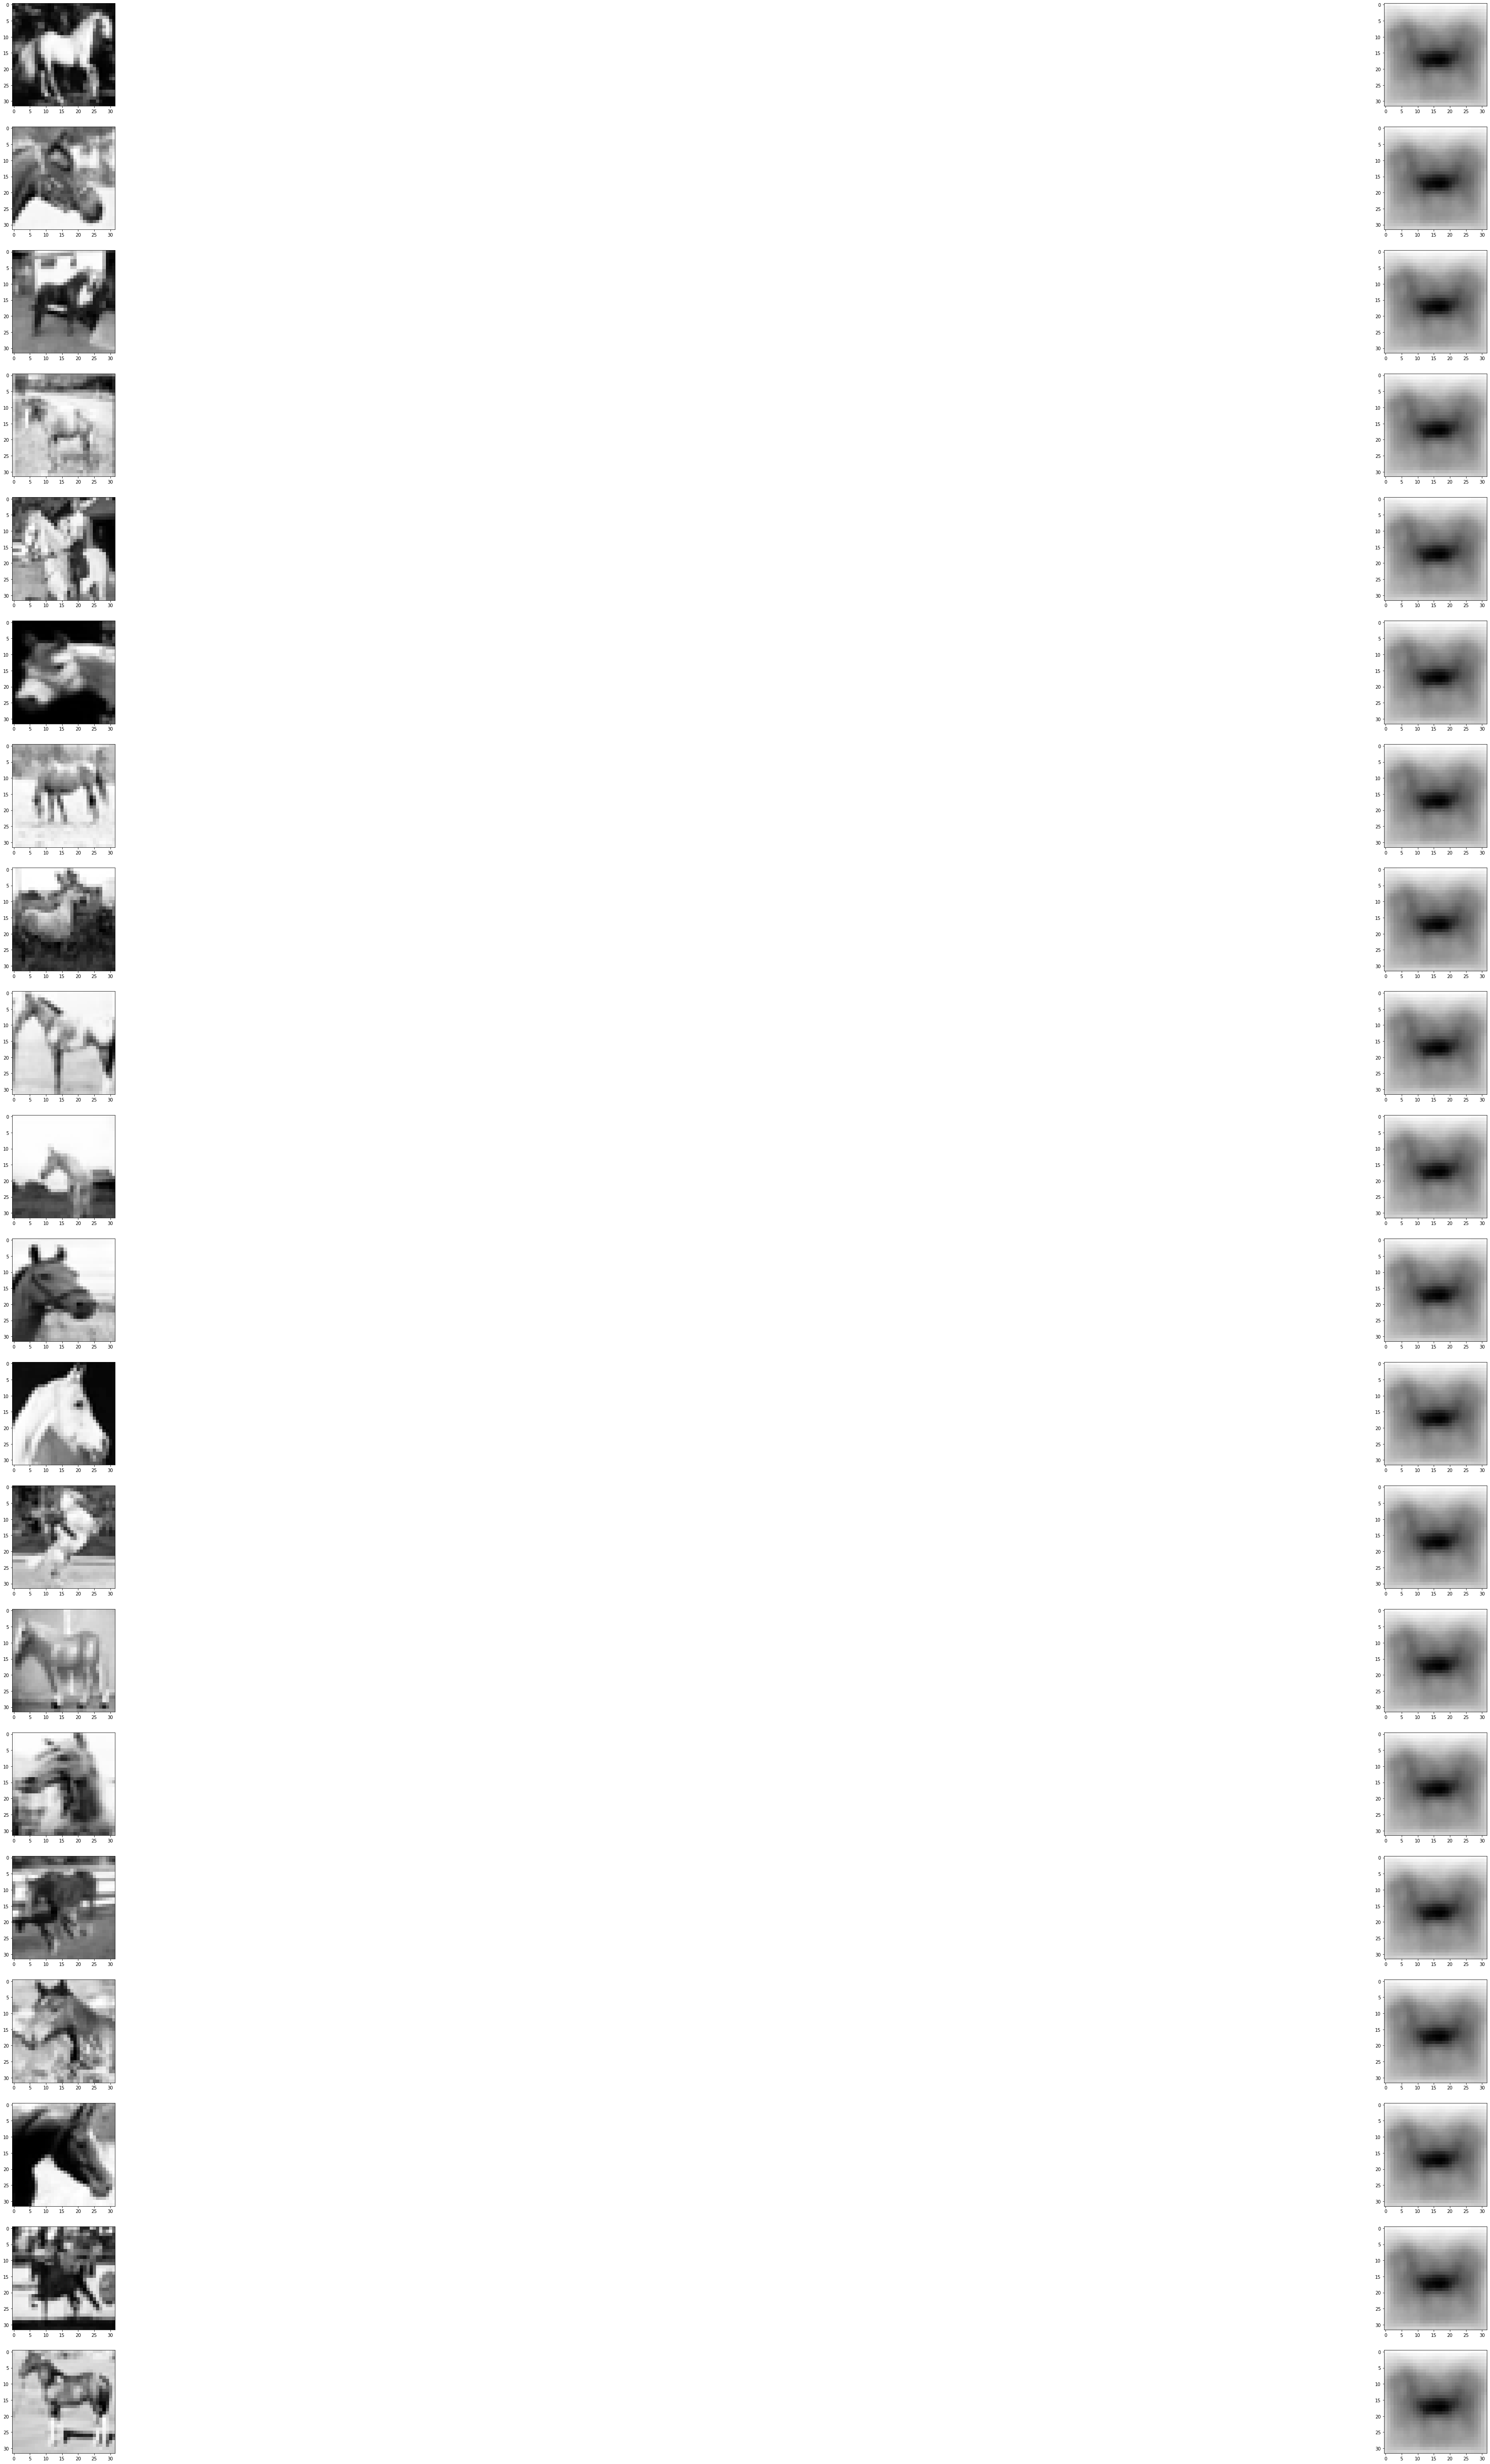

In [25]:
plt.rcParams['figure.figsize'] = (100, 100)
plt.figure()
for i in range(20):
    plt.subplot(20, 2, i*2 + 1)
    original_img = np.reshape(test_horse[i, :], (32, 32))
    plt.imshow(original_img, cmap='Greys_r')
    
    plt.subplot(20, 2, i*2 + 2)
    reconstructed_img = np.reshape(decode(ae, np.asarray([encodings_horse[i]])), (32,32))
    plt.imshow(reconstructed_img, cmap='Greys_r')

plt.show()

In [26]:
x_train = np.reshape(np.array(horse_x), (horse_x.shape[0], 32, 32, 1))
x_test = np.reshape(np.array(test_horse), (test_horse.shape[0], 32, 32, 1))

noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [27]:
autoencoder = Denoise()

In [28]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [29]:
noise_train(autoencoder, x_train_noisy, x_test_noisy, x_train, x_test)

Epoch 1/50
  8/100 [=>............................] - ETA: 3s - loss: 17731.9297
Epoch 00001: saving model to ../../models/model.ckpt
 18/100 [====>.........................] - ETA: 3s - loss: 17712.7520
Epoch 00001: saving model to ../../models/model.ckpt
 28/100 [=======>......................] - ETA: 2s - loss: 17726.5195
Epoch 00001: saving model to ../../models/model.ckpt
 38/100 [==========>...................] - ETA: 2s - loss: 17686.0371
Epoch 00001: saving model to ../../models/model.ckpt
 48/100 [=============>................] - ETA: 1s - loss: 17638.2773
Epoch 00001: saving model to ../../models/model.ckpt
 58/100 [================>.............] - ETA: 1s - loss: 17552.0371
Epoch 00001: saving model to ../../models/model.ckpt
 68/100 [===================>..........] - ETA: 1s - loss: 17554.1836
Epoch 00001: saving model to ../../models/model.ckpt
 78/100 [======================>.......] - ETA: 0s - loss: 17625.7988
Epoch 00001: saving model to ../../models/model.ckpt
 88/1

Epoch 7/50
  9/100 [=>............................] - ETA: 2s - loss: 17374.5078
Epoch 00007: saving model to ../../models/model.ckpt
 18/100 [====>.........................] - ETA: 2s - loss: 17501.8242
Epoch 00007: saving model to ../../models/model.ckpt
 28/100 [=======>......................] - ETA: 2s - loss: 17530.1406
Epoch 00007: saving model to ../../models/model.ckpt
 38/100 [==========>...................] - ETA: 2s - loss: 17498.4941
Epoch 00007: saving model to ../../models/model.ckpt
 48/100 [=============>................] - ETA: 1s - loss: 17539.8984
Epoch 00007: saving model to ../../models/model.ckpt
 58/100 [================>.............] - ETA: 1s - loss: 17572.7246
Epoch 00007: saving model to ../../models/model.ckpt
 68/100 [===================>..........] - ETA: 1s - loss: 17573.5723
Epoch 00007: saving model to ../../models/model.ckpt
 78/100 [======================>.......] - ETA: 0s - loss: 17503.3320
Epoch 00007: saving model to ../../models/model.ckpt
 88/1

 19/100 [====>.........................] - ETA: 2s - loss: 17698.3555
Epoch 00013: saving model to ../../models/model.ckpt
 29/100 [=======>......................] - ETA: 2s - loss: 17592.3926
Epoch 00013: saving model to ../../models/model.ckpt
 39/100 [==========>...................] - ETA: 2s - loss: 17609.8398
Epoch 00013: saving model to ../../models/model.ckpt
 48/100 [=============>................] - ETA: 1s - loss: 17669.4824
Epoch 00013: saving model to ../../models/model.ckpt
 59/100 [================>.............] - ETA: 1s - loss: 17661.1250
Epoch 00013: saving model to ../../models/model.ckpt
 69/100 [===================>..........] - ETA: 1s - loss: 17666.4121
Epoch 00013: saving model to ../../models/model.ckpt
 79/100 [======================>.......] - ETA: 0s - loss: 17601.1113
Epoch 00013: saving model to ../../models/model.ckpt
 89/100 [=========================>....] - ETA: 0s - loss: 17603.6113
Epoch 00013: saving model to ../../models/model.ckpt
 99/100 [=======

 28/100 [=======>......................] - ETA: 2s - loss: 17500.8672
Epoch 00019: saving model to ../../models/model.ckpt
 38/100 [==========>...................] - ETA: 2s - loss: 17540.8359
Epoch 00019: saving model to ../../models/model.ckpt
 48/100 [=============>................] - ETA: 1s - loss: 17570.6543
Epoch 00019: saving model to ../../models/model.ckpt
 58/100 [================>.............] - ETA: 1s - loss: 17507.7402
Epoch 00019: saving model to ../../models/model.ckpt
 68/100 [===================>..........] - ETA: 1s - loss: 17501.4121
Epoch 00019: saving model to ../../models/model.ckpt
 78/100 [======================>.......] - ETA: 0s - loss: 17556.4316
Epoch 00019: saving model to ../../models/model.ckpt
 88/100 [=========================>....] - ETA: 0s - loss: 17569.5234
Epoch 00019: saving model to ../../models/model.ckpt
 98/100 [============================>.] - ETA: 0s - loss: 17562.2715
Epoch 00019: saving model to ../../models/model.ckpt
100/100 [=======

 38/100 [==========>...................] - ETA: 2s - loss: 17600.4102
Epoch 00025: saving model to ../../models/model.ckpt
 49/100 [=============>................] - ETA: 2s - loss: 17576.1816
Epoch 00025: saving model to ../../models/model.ckpt
 59/100 [================>.............] - ETA: 1s - loss: 17662.3418
Epoch 00025: saving model to ../../models/model.ckpt
 69/100 [===================>..........] - ETA: 1s - loss: 17673.2773
Epoch 00025: saving model to ../../models/model.ckpt
 78/100 [======================>.......] - ETA: 1s - loss: 17657.6426
Epoch 00025: saving model to ../../models/model.ckpt
 89/100 [=========================>....] - ETA: 0s - loss: 17627.9414
Epoch 00025: saving model to ../../models/model.ckpt
 99/100 [============================>.] - ETA: 0s - loss: 17583.6836
Epoch 00025: saving model to ../../models/model.ckpt
100/100 [==============================] - 5s 54ms/step - loss: 17572.3242 - val_loss: 17928.0547
Epoch 26/50
  9/100 [=>..................

 49/100 [=============>................] - ETA: 2s - loss: 17487.2500
Epoch 00031: saving model to ../../models/model.ckpt
 59/100 [================>.............] - ETA: 2s - loss: 17462.3184
Epoch 00031: saving model to ../../models/model.ckpt
 68/100 [===================>..........] - ETA: 1s - loss: 17575.8066
Epoch 00031: saving model to ../../models/model.ckpt
 78/100 [======================>.......] - ETA: 1s - loss: 17614.0723
Epoch 00031: saving model to ../../models/model.ckpt
 88/100 [=========================>....] - ETA: 0s - loss: 17583.3809
Epoch 00031: saving model to ../../models/model.ckpt
 98/100 [============================>.] - ETA: 0s - loss: 17573.8359
Epoch 00031: saving model to ../../models/model.ckpt
100/100 [==============================] - 5s 54ms/step - loss: 17572.3242 - val_loss: 17928.0547
Epoch 32/50
  9/100 [=>............................] - ETA: 3s - loss: 17385.9062
Epoch 00032: saving model to ../../models/model.ckpt
 18/100 [====>...............

 58/100 [================>.............] - ETA: 1s - loss: 17650.9180
Epoch 00037: saving model to ../../models/model.ckpt
 68/100 [===================>..........] - ETA: 1s - loss: 17609.8125
Epoch 00037: saving model to ../../models/model.ckpt
 78/100 [======================>.......] - ETA: 0s - loss: 17662.7598
Epoch 00037: saving model to ../../models/model.ckpt
 88/100 [=========================>....] - ETA: 0s - loss: 17647.7988
Epoch 00037: saving model to ../../models/model.ckpt
 98/100 [============================>.] - ETA: 0s - loss: 17591.0781
Epoch 00037: saving model to ../../models/model.ckpt
100/100 [==============================] - 4s 41ms/step - loss: 17572.3301 - val_loss: 17928.0547
Epoch 38/50
  8/100 [=>............................] - ETA: 2s - loss: 17437.1328
Epoch 00038: saving model to ../../models/model.ckpt
 18/100 [====>.........................] - ETA: 2s - loss: 18023.2676
Epoch 00038: saving model to ../../models/model.ckpt
 28/100 [=======>............

 68/100 [===================>..........] - ETA: 1s - loss: 17509.0957
Epoch 00043: saving model to ../../models/model.ckpt
 78/100 [======================>.......] - ETA: 1s - loss: 17521.2266
Epoch 00043: saving model to ../../models/model.ckpt
 88/100 [=========================>....] - ETA: 0s - loss: 17559.2070
Epoch 00043: saving model to ../../models/model.ckpt
 98/100 [============================>.] - ETA: 0s - loss: 17568.9688
Epoch 00043: saving model to ../../models/model.ckpt
100/100 [==============================] - 6s 58ms/step - loss: 17572.3242 - val_loss: 17928.0547
Epoch 44/50
  8/100 [=>............................] - ETA: 3s - loss: 17714.5879
Epoch 00044: saving model to ../../models/model.ckpt
 19/100 [====>.........................] - ETA: 3s - loss: 17617.2227
Epoch 00044: saving model to ../../models/model.ckpt
 28/100 [=======>......................] - ETA: 3s - loss: 17455.9531
Epoch 00044: saving model to ../../models/model.ckpt
 39/100 [==========>.........

 79/100 [======================>.......] - ETA: 1s - loss: 17578.1074
Epoch 00049: saving model to ../../models/model.ckpt
 88/100 [=========================>....] - ETA: 0s - loss: 17616.2559
Epoch 00049: saving model to ../../models/model.ckpt
 99/100 [============================>.] - ETA: 0s - loss: 17580.0039
Epoch 00049: saving model to ../../models/model.ckpt
100/100 [==============================] - 6s 56ms/step - loss: 17572.3223 - val_loss: 17928.0547
Epoch 50/50
  9/100 [=>............................] - ETA: 3s - loss: 18250.8066
Epoch 00050: saving model to ../../models/model.ckpt
 19/100 [====>.........................] - ETA: 3s - loss: 17909.0977
Epoch 00050: saving model to ../../models/model.ckpt
 29/100 [=======>......................] - ETA: 3s - loss: 17847.2285
Epoch 00050: saving model to ../../models/model.ckpt
 39/100 [==========>...................] - ETA: 2s - loss: 17818.8008
Epoch 00050: saving model to ../../models/model.ckpt
 48/100 [=============>......

In [30]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

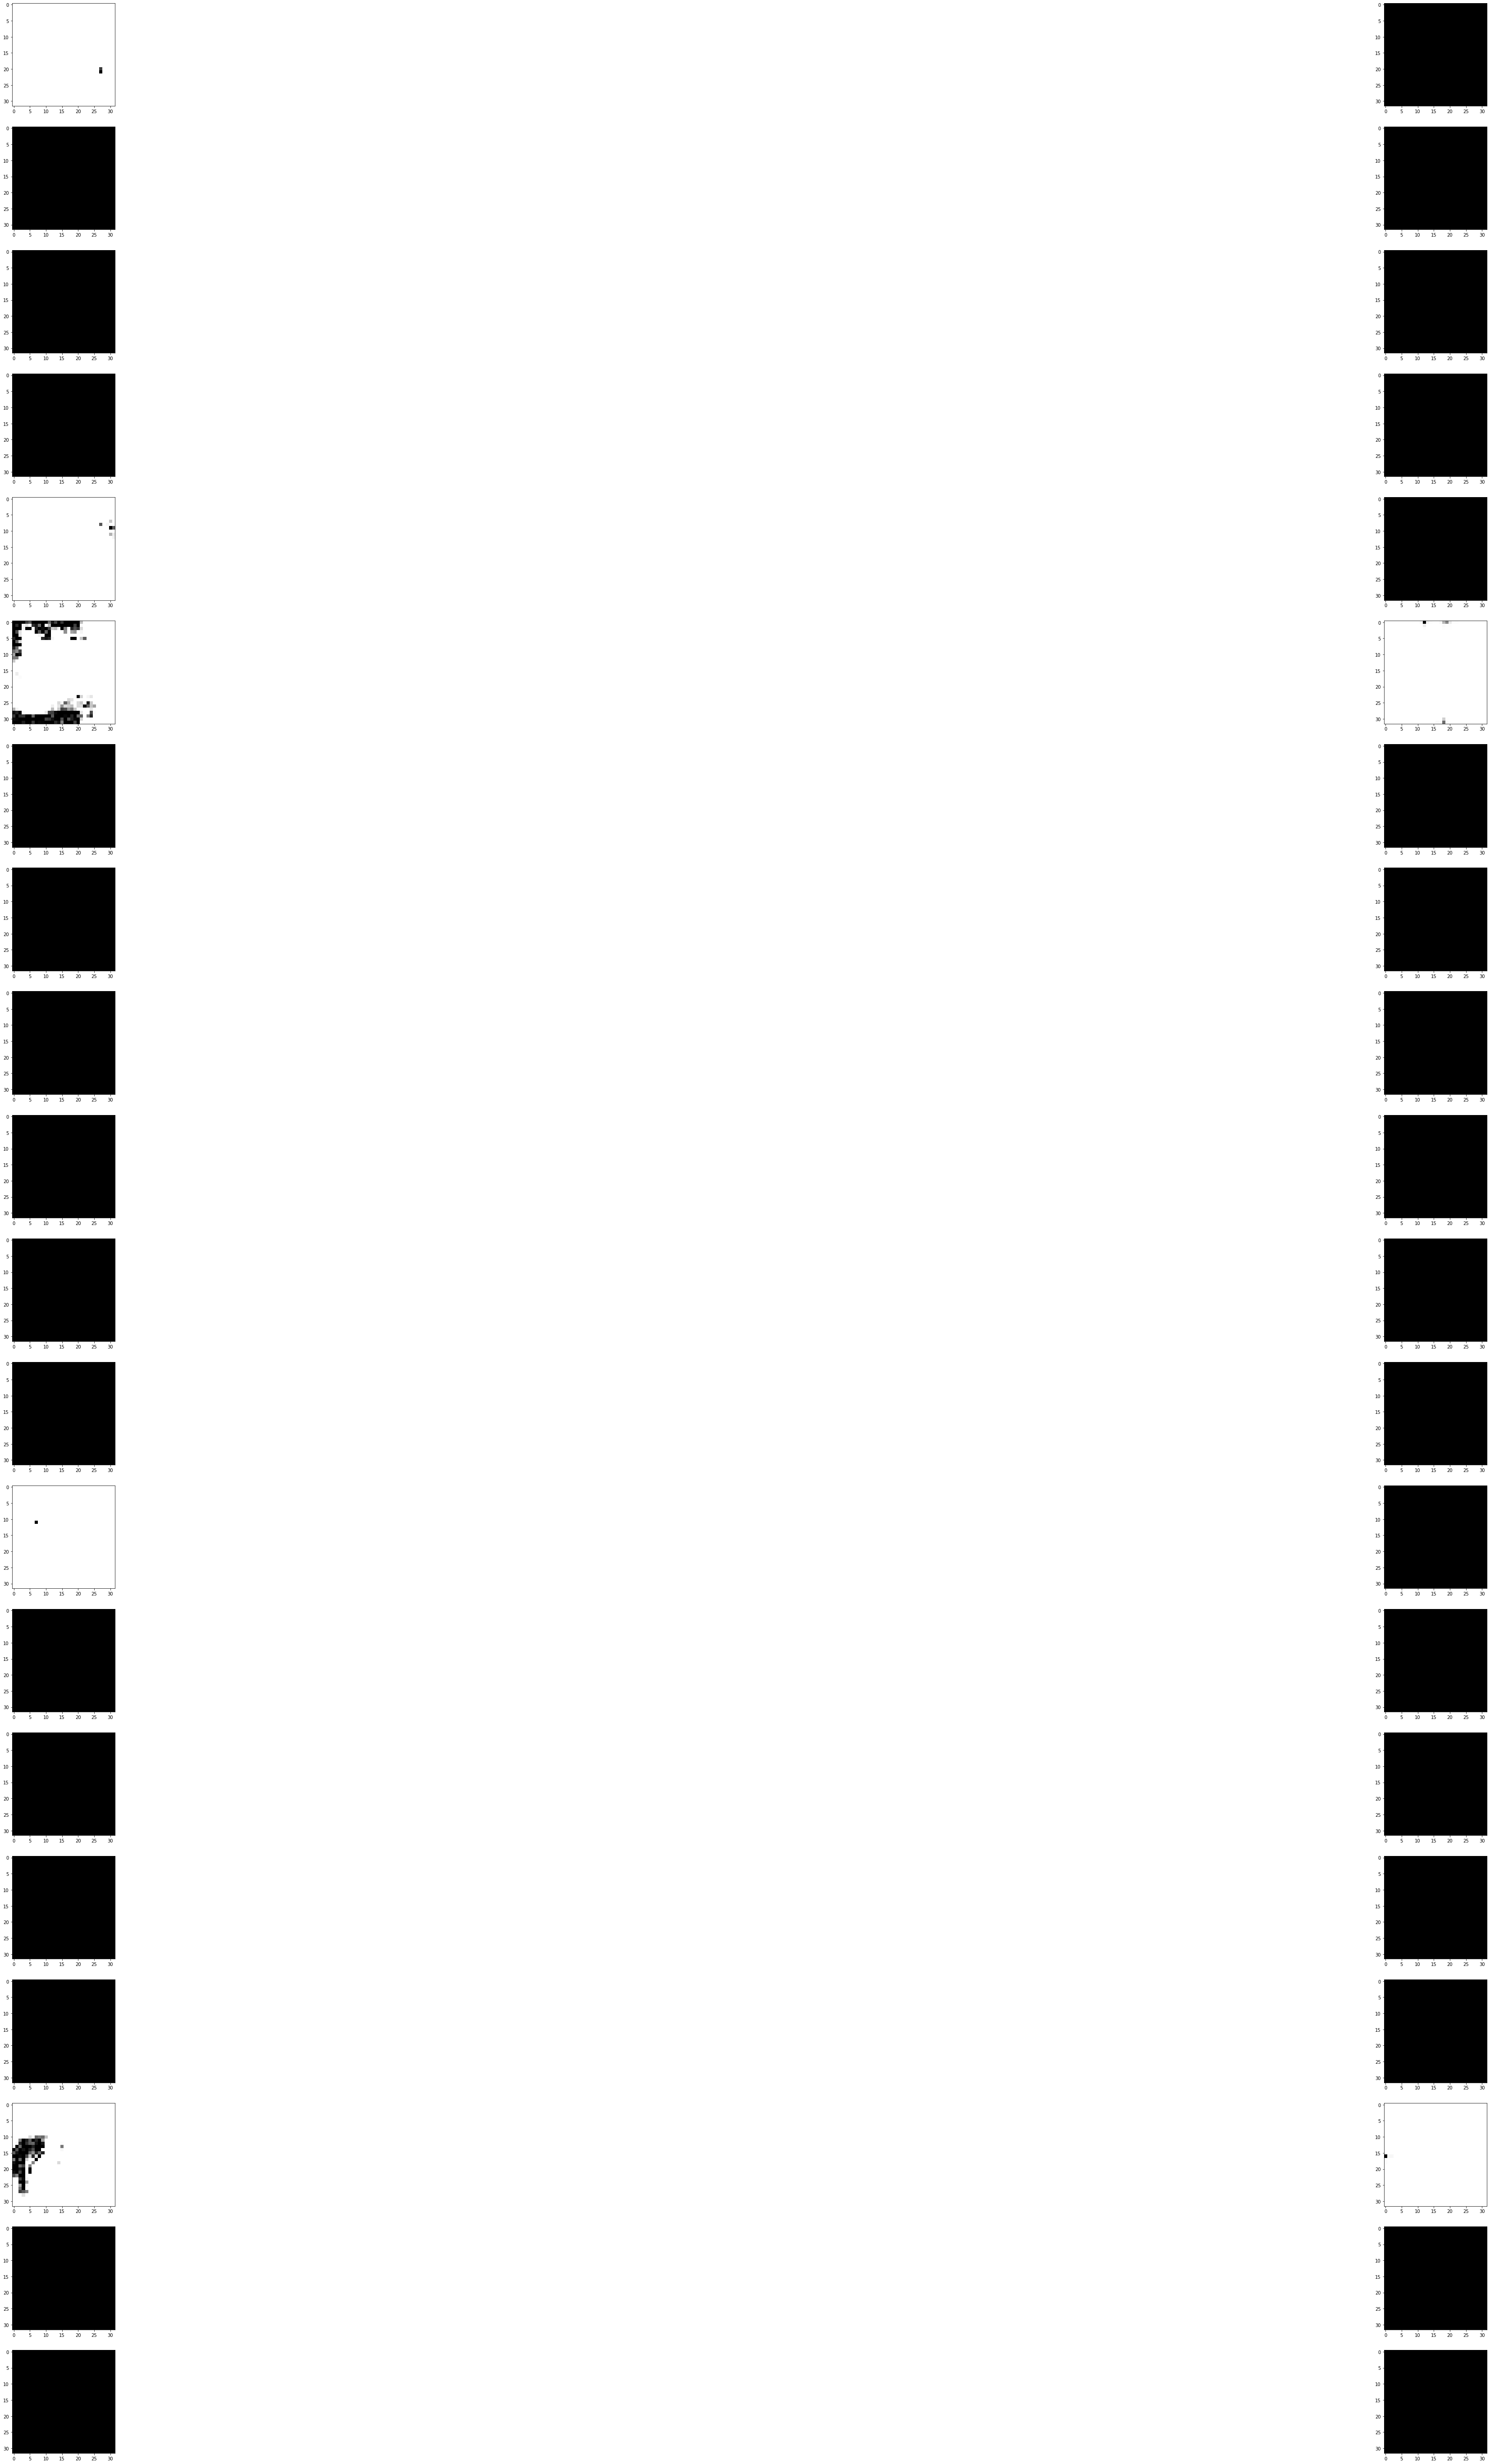

In [46]:
plt.rcParams['figure.figsize'] = (100, 100)
plt.figure()
for i in range(20):
    ax = plt.subplot(20, 2, i*2 + 1)
    horse_img = np.reshape(x_test_noisy[i, :], (32, 32))
    plt.imshow(horse_img, cmap='Greys_r')

    # display reconstruction
    bx = plt.subplot(20, 2, i*2 + 2)    
    horse_img2 = np.reshape(decoded_imgs[i, :], (32, 32))
    plt.imshow(horse_img2, cmap='Greys_r')

plt.show()